# Исследование объявлений о продаже квартир


**Цель проекта:**
Используя архивные данные сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет, определить рыночную стоимость объектов недвижимости и типичные параметры квартир.


### Подготовка данных

#### Импорт библиотек и файлов с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#### Изучим общую информацию, посмотрим типы данных и количество ненулеых значений

In [3]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [83]:
display(data.tail(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,year_exposition,month_exposition,weekday_exposition,floor_category,city_center_distance
23689,13,3550.0,35.30,2018-02-28,1,2.86,15,16.3,4,False,False,False,9.10,2,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0,100.566572,2018,2,2,другой,16.0
23690,3,5500.0,52.00,2018-07-19,2,2.65,5,31.0,2,False,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,105.769231,2018,7,3,другой,6.0
23691,11,9470.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,129.903978,2016,10,3,другой,4.0
23692,2,1350.0,30.00,2017-07-07,1,2.65,5,17.5,4,False,False,False,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,45.000000,2017,7,4,другой,NaN
23693,9,4600.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,False,False,8.00,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,73.717949,2016,8,4,другой,34.0
23694,9,9700.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72.490845,2017,3,1,другой,4.0
23695,14,3100.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,52.542373,2018,1,0,другой,NaN
23696,18,2500.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,False,False,9.00,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.091711,2018,2,6,первый,NaN
23697,13,11475.0,76.75,2017-03-28,2,3.00,17,30.0,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149.511401,2017,3,1,другой,10.0
23698,4,1350.0,32.30,2017-07-21,1,2.50,5,12.3,1,False,False,False,9.00,0,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.795666,2017,7,4,первый,NaN


In [5]:
data.describe().style.format({'last_price' : '{:,.0f}'})

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,"23,699",23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,"6,541,549",60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,"10,887,013",35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,"12,190",12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,"3,400,000",40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,"4,650,000",52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,"6,800,000",69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,"763,000,000",900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Найдем количество пропусков в данных

In [7]:
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

**ВЫВОДЫ ПО ДАННЫМ:**

1. В датафрейме 23699 строки, много пропусков в данных.
2. Необходимо изменить первые проблемы и некорректные типы данных:  
first_day_exposition тип object - должен быть тип datetime, также нужно избавиться от времени публикации.  
ceiling_height - данные отсутствуют у 9195 квартир  
floors_total - должен быть тип int, т.к. количество этажей - целое значение  
is_apartment - должен быть тип bool   
living_area - отсутствуют данные у 1903 объектов  
kitchen_area - отсутствуют данные у 2278 объектов  
balcony - отсутствуют данные у 11519 квартир  
locality_name - отсутсвуют данные у 49 объектов  
airports_nearest - отсутствуют данные у 5542 объектов  
cityCenters_nearest - отсутствуют данные у 5519 объектов  
parks_around3000 - некорректный тип (должен быть int) + отсутствуют данные у 5518 объектов  
parks_nearest - отсутствуют данные у 15620 объектов 
ponds_around3000 - тип должен быть int + отсутствуют данные у 5518 объектов  
ponds_nearest - отсутствуют данные у 14589 объектов  
days_exposition - около 13% данных (3181) пропущено

Необходимо детальнее рассмотреть столбцы, принять решение, где обоснованно можно заполнить пропуски, а где оставить, где имеет смысл изменить тип данных, проверить данные на наличие явных и скрытых дубликатов, поработать с редкими и выбивающимися значениями. 


Построим общую гистограмму для всех столбцов таблицы

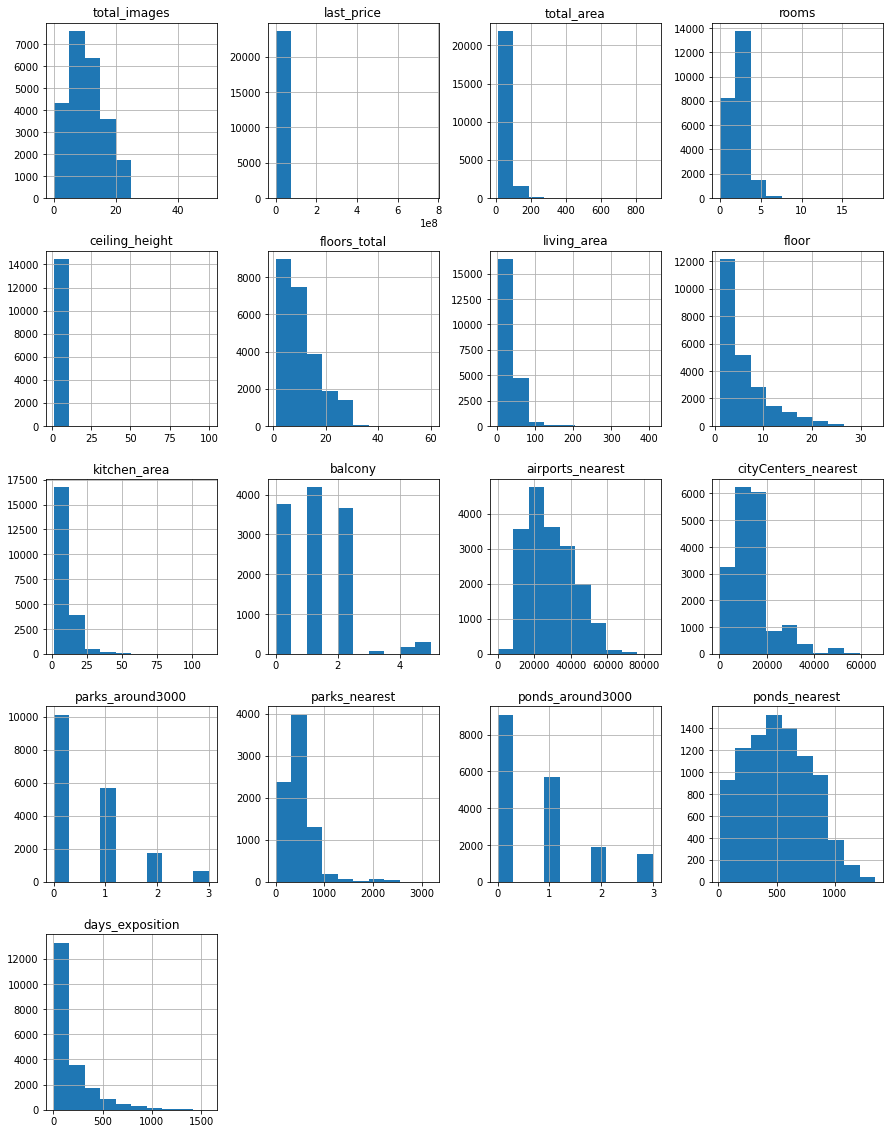

In [8]:
data.hist(figsize=(15, 20)) 
plt.show() 

### Предобработка данных

Проверяем наличие дубликатов

In [9]:
data.duplicated().sum() 

0

Выводим список столбцов

In [10]:
data.columns.tolist()

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'cityCenters_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

**Cтолбец first_day_exposition**

Переведем столбец с датой в формат даты без времени, т.к. время не указано


In [84]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

**Cтолбец last_price**

Избавимся от лишних нулей, разделив значения на 1000

In [85]:
data['last_price'] = data['last_price'] / 1000  

Посмотрим, что получилось

In [13]:
print(data['last_price'].describe()) 

count     23699.000000
mean       6541.548772
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64


In [14]:
display(data.head()) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Столбец ceiling_height**

Почти половина данных по высоте потолков пропущена. Это может быть связано с неполным заполнением данных самим продавцом. 
Данные являются количественными, заполним пропущенные значения медианным.
Поделим на 10 значения от 22 до 32 и посмотрим, что получилось.

In [15]:
data.loc[(data['ceiling_height'] >= 22)
         & (data['ceiling_height'] <= 32), 'ceiling_height'] /= 10
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 

print(data['ceiling_height'].describe())

count    23699.000000
mean         2.703278
std          0.688449
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


Значения меньше 2 м и больше 6 м выглядят нереалистичными и могут считаться выбросами. Проверим количество таких значений


In [16]:
print(data.loc[data['ceiling_height'] < 2]['ceiling_height'].count())
print(data.loc[data['ceiling_height'] >= 6]['ceiling_height'].count())

3
9


Так, как пободных отклонений не много, удалим их и проверим, что получилось

In [17]:
data = data[(data.ceiling_height <= 6)]
data = data[(data.ceiling_height > 2)] 

print(data['ceiling_height'].describe()) 

count    23677.000000
mean         2.697235
std          0.220673
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64


**Столбец balcony**

Много пропусков в данных по количеству балконов. Это также может быть связано с некорректным заполнением данных.
Посмотрим на уникальные значения

In [18]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Заменим пропуски в balcony на 0 и изменим тип на 'int', так количество балконов - целое число

In [19]:
data.loc[data['balcony'].isna(), 'balcony'] = 0
data['balcony'] = data['balcony'].astype('int')
print('Количество пропусков =', data['balcony'].isna().sum())

Количество пропусков = 0


**Столбец floors_total**

В данных floors_total попущено всего 86 значений, поэтому удалим строки с пропущенными значениями.  
Изменим тип на 'int', так как количество этажей - целое число

In [20]:
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype('int')
print('Количество пропусков =', data['floors_total'].isna().sum())

Количество пропусков = 0


Проверяем, что получилось

In [21]:
data['floors_total'].describe() 

count    23591.000000
mean        10.673477
std          6.595893
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Высота дома в 60 этажей выглядит нереалистичной. Проверим количество зданий больше 32 этажей

In [22]:
print(data.loc[data['floors_total'] > 36]['floors_total'].count()) 

2


Удалим значения с высотой домов более 36 этажей, так как это максимальное количество этажей в жилом доме Санкт-Петербурга,
и проверим, что получилось.

*по данным агентства недвижимости dom.info.spb*

In [23]:
data = data[(data.floors_total < 36)] 

In [24]:
data['floors_total'].describe() 

count    23586.000000
mean        10.666412
std          6.577067
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: floors_total, dtype: float64

**Столбец is_apartment**

Много пропусков в столбце апартаменты, возможно, данные стали добавляться позже, чем все остальные, 
так как этот тип квартир появился недавно.  

Все пропущенные значения заменим на False. Данные должны иметь булев тип.

In [25]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype('bool')
print('Количество пропусков =', data['is_apartment'].isna().sum())

Количество пропусков = 0


**Столбец locality_name**

Посмотрим на уникальные значения в столюце locality_name

In [26]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Бросается в глаза разное написание "поселок" и "посёлок", использование разных регистров. Возможно, есть неявные дубликаты.
Избавимся от буквы ё

In [27]:
data['locality_name'] = data['locality_name'].str.replace('ё','е') 

Поработаем с неявными дубликатами, приведем данные к единому виду записи и проверим выполнение

In [28]:
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок', regex=True)

In [29]:
data['locality_name'].unique().tolist()  

['Санкт-Петербург',
 'поселок Шушары',
 'поселок Янино-1',
 'поселок Парголово',
 'поселок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок Красный Бор',
 'Гатчина',
 'деревня Федоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'поселок Металлострой',
 'поселок Лебяжье',
 'поселок Сиверский',
 'поселок Молодцово',
 'поселок Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'поселок Аннино',
 'поселок Ефимовский',
 'поселок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'поселок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'поселок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 'Мурино',
 'Шлиссельбург',
 'Никольское',
 'Зеленогорск',
 'Сосновый Бор',
 'деревня Оржицы',
 'деревня Кальти

Проверяем дубликаты

In [30]:
print(data.duplicated().sum()) 

0


Определим количество пропущенных значений

In [31]:
data['locality_name'].isna().sum()

48

Удалим строки с пропущенными значениями

In [32]:
data.dropna(subset=['locality_name'], inplace=True)

**Столбец days_exposition**

В столбце много пропусков и тип данных хорошо бы заменить на int. Но мы не значем, чем вызваны пропуски. На данном этапе лучше оставить, как есть, и позже поработать с этим столбцом.

**Столбец living_area**

Считаем, какая медианная доля общей площади - жилая, и заполняем пропуски. Посмотрим, что получилось

In [33]:
data['living_area'] = data['living_area'].fillna((data['rooms']
                                                  * data['living_area'].median()
                                                  / data['rooms'].median()))

In [34]:
data['living_area'].describe() 

count    23538.000000
mean        34.181499
std         21.645913
min          0.000000
25%         18.400000
50%         30.000000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

Значение в 409 кв.м жилой площади выглядит нереалистичным. Вероятнее всего, есть ошибки в данных, вызванные человеческим фактором.

Проверим количество квартир площадью более 150 кв.м

In [35]:
print(data.loc[data['living_area'] > 150]['living_area'].count()) 

119


Подавляющее большинство квартир имеют реалистичную площадь менее 150 кв.м, среднее и медианное значения ожидаемы, 34 и 30 кв.м соответственно, значения в 409 кв.м вероятнее всего вызваны неправильно поставленной запятой или иными человеческими факторами. Но мы оставим выделающиеся значения, так как не можем гарантированно определить верхний предел возможной площади.

**Столбец kitchen_area** 

Пропуски в kitchen_area заполним медианным значением. Учтем, что в квартирах-студиях кухни нет.

In [36]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0 
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median()) 

Посмотрим, что получилось

In [37]:
data['kitchen_area'].describe() 

count    23538.000000
mean        10.359026
std          5.694370
min          0.000000
25%          7.200000
50%          9.000000
75%         11.410000
max        112.000000
Name: kitchen_area, dtype: float64

Значение площади кухни 112 кв.м выглядит не реалистичным ( и вызывает завсить, как и квартира в 409 кв.м), но мы также не будем удалять эти значения, так как не можем гарантированно их отрицать. Медианное значение 9 кв.м и среднее 10,36 кв.м выглядят реалистичными

**Стоблец rooms**

В квартирах-студиях комнат нет - назначаем ноль. И смотрим на результат

In [38]:
data.loc[data['studio'] == True, 'rooms'] = 0 

In [39]:
data['rooms'].describe() 

count    23538.000000
mean         2.070567
std          1.079532
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Большинство квартир 1-, 2-х и 3-х комнатные. Иные значения могут быть выбросами, перепланировкой, жильем по индивидуальным проектам, 
ошибками, вызванными человеческим фактором. 

**Столбец cityCenters_nearest**

Изменим название столбца cityCenters_nearest на более корректное

In [40]:
data = data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'})

Посмотрим, как изменились данные после предобработки

In [41]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23538 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23538 non-null  int64         
 1   last_price            23538 non-null  float64       
 2   total_area            23538 non-null  float64       
 3   first_day_exposition  23538 non-null  datetime64[ns]
 4   rooms                 23538 non-null  int64         
 5   ceiling_height        23538 non-null  float64       
 6   floors_total          23538 non-null  int64         
 7   living_area           23538 non-null  float64       
 8   floor                 23538 non-null  int64         
 9   is_apartment          23538 non-null  bool          
 10  studio                23538 non-null  bool          
 11  open_plan             23538 non-null  bool          
 12  kitchen_area          23538 non-null  float64       
 13  balcony         

**Выводы:**  
Мы выполнили первую предобработку данных.
1. В солбце "дата размещения" осталась только дата, без времени  
2. Высоты потолков приведены к реалистичным  
3. Пропущенные этажности зданий заполнены и приведены к реалистичным 
4. Пропуски в жилых площадях и площадях кухонь заполнены  
5. Пропущенные значения в полях "апартаменты" и "балкон" заполнены.  
6. После заполнения пропусков изменен тип данных в столбце "апартаменты" на булев, как и должно быть 
7. Квартирам-студям назначено единое число комнат 0.  
8. Столбец cityCenters_nearest переименован  
9. Данные приведены к целочисленным, где это возможно  
10. Количество объектов уменьшилось до 23518.  
Много пропусков в картографических данных, но мы оставим без изменений, так как заполнение не будет обоснованным.  

Предобработка данных - достаточно трудоемкий процесс. Важно правильно расставить приоритеты на первом этапе анализа, руководствуясь общим принципом: заполнение должно обоснованно повышать качество данных. Если мы понимаем, что у нас нет никаких оснований полагать, что выбран относительно точный способ заполнения, то смысла в таком заполнении нет. Не всегда можно определить медианное значение в зависимости от значений другого параметра.
Полная предобработка значений, в том числе ненужных для анализа параметров, не только увеличивает объем работы, но увеличивает риск "закопаться" в данных.

### Добавление новых столбцов в таблицу

#### Цена одного квадратного метра

Найдем цену за 1 кв. метр квартиры, разделив цену на общую площадь квартиры

In [42]:
data['square_meter_price'] = data['last_price'] / data['total_area']
data[['square_meter_price']].sample(5, random_state=73)

,square_meter_price
5441,134.281201
923,56.153846
16267,75.000000
12342,79.656250
22083,56.962025


#### Дата публикации объявления

Создадим столбцы дня, месяца, года и проверим результат

In [43]:
data['year_exposition'] = data['first_day_exposition'].dt.year
data['month_exposition'] = data['first_day_exposition'].dt.month
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday 
data[['weekday_exposition', 'month_exposition', 'year_exposition']].sample(5, random_state=20) 

,weekday_exposition,month_exposition,year_exposition
3535,1,6,2017
18967,1,9,2017
978,4,3,2018
21990,5,9,2018
3337,2,10,2018


#### Тип этажа квартиры

Напишем функцию категоризации по этажам, используя метод apply к каждой строке датафрейма через axis = 1

In [44]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else: 
        return 'другой'

    
# категоризуем этажи с помощью функции 

data['floor_category'] = data.apply(floor_category, axis = 1)   

#### Расстояние до центра города в километрах

Добавим столбец расстояния до центра города в километрах, округлив до целых значений, и проверим результат

In [45]:
data['city_center_distance'] = (data['city_centers_nearest'] / 1000)
data['city_center_distance'] = round(data['city_center_distance'], 0) 

In [46]:
data.sample(5, random_state=50) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,year_exposition,month_exposition,weekday_exposition,floor_category,city_center_distance
4356,1,3800.0,43.00,2017-06-25,1,2.65,25,18.0,4,False,False,False,11.0,0,поселок Парголово,53891.0,18057.0,0.0,NaN,0.0,NaN,21.0,88.372093,2017,6,6,другой,18.0
10839,19,10990.0,93.50,2018-10-03,4,2.70,19,51.2,13,False,False,False,10.8,0,Санкт-Петербург,30394.0,11526.0,1.0,532.0,1.0,896.0,121.0,117.540107,2018,10,2,другой,12.0
686,9,1300.0,42.00,2018-11-28,2,2.60,2,30.0,1,False,False,False,6.0,1,деревня Лопухинка,NaN,NaN,NaN,NaN,NaN,NaN,45.0,30.952381,2018,11,2,первый,NaN
1297,19,17600.0,150.00,2017-08-28,4,3.00,9,79.0,1,False,False,False,25.0,2,Санкт-Петербург,41862.0,13565.0,0.0,NaN,1.0,755.0,57.0,117.333333,2017,8,0,первый,14.0
1937,6,3500.0,45.52,2017-10-02,2,2.58,5,29.9,4,False,False,False,7.0,0,Санкт-Петербург,22229.0,14421.0,0.0,NaN,1.0,231.0,147.0,76.889279,2017,10,0,другой,14.0


Посмотрим на информацию о данных

In [47]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23538 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23538 non-null  int64         
 1   last_price            23538 non-null  float64       
 2   total_area            23538 non-null  float64       
 3   first_day_exposition  23538 non-null  datetime64[ns]
 4   rooms                 23538 non-null  int64         
 5   ceiling_height        23538 non-null  float64       
 6   floors_total          23538 non-null  int64         
 7   living_area           23538 non-null  float64       
 8   floor                 23538 non-null  int64         
 9   is_apartment          23538 non-null  bool          
 10  studio                23538 non-null  bool          
 11  open_plan             23538 non-null  bool          
 12  kitchen_area          23538 non-null  float64       
 13  balcony         

### Проведем исследовательский анализ данных

#### Общая площадь

Построим гисторамму для значений общей площади

count    23538.000000
mean        60.334286
std         35.671027
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

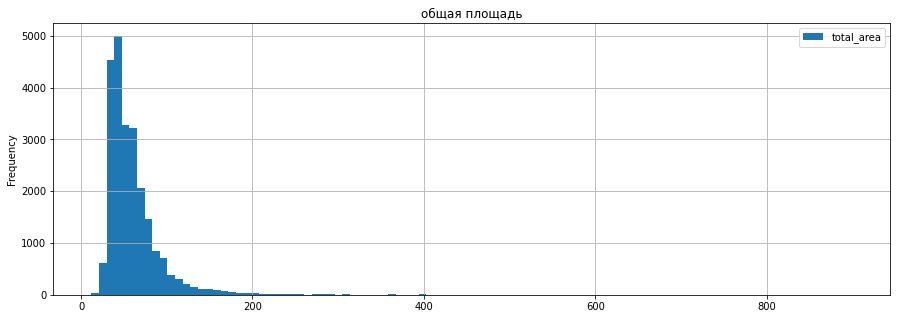

In [48]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, title='общая площадь', grid=True, figsize = (15,5)) 
data['total_area'].describe() 

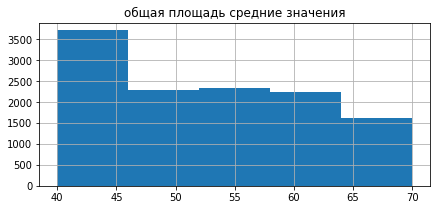

In [49]:
data.hist('total_area', bins=5, range =(40, 70), figsize=(7,3))
plt.title('общая площадь средние значения')
plt.show()

Распределение площадей вполне ожидаемое - средняя площадь 60 кв. метров, медианная 52 кв.м, встречаются значения от 200 кв.м, что можно объяснить элитной недвижимостью. Но очевидно, бОльшая часть квартир - однокомнатные или двухкомнатные. Максимальное значение 900 кв.м выделяется. Возможно, не правильно расставлены запятые, что привело к некорректным значениям. С помощью метода describe получили общее представление.

#### Жилая площадь

Построим гистограмму для значений жилой площади

count    23538.000000
mean        34.181499
std         21.645913
min          0.000000
25%         18.400000
50%         30.000000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

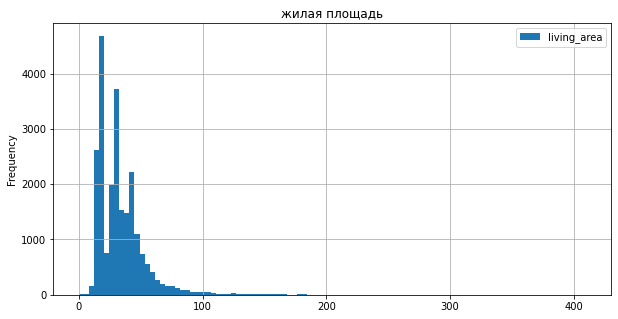

In [50]:
data
data.plot(y = 'living_area', kind = 'hist', bins = 100, title='жилая площадь', grid=True, figsize = (10,5))
data['living_area'].describe() 

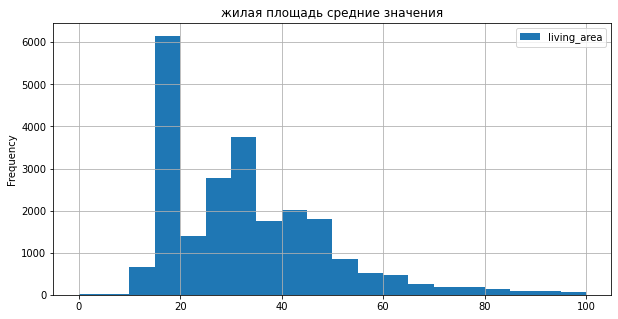

In [51]:
data.plot(y = 'living_area', kind = 'hist', bins = 20, 
          title='жилая площадь средние значения', grid=True, range=(0, 100), figsize = (10,5)) 
plt.show()   

Мы наблюдаем высокий пик значений 15-20 кв.м. Скорее всего, это однокомнатные квартиры. Второй пик 30-35 кв.м, скорее всего, двухкомнатные квартиры. Значения 40-50 кв.м, очевидно - трехкомнатные квартиры. Отношение примерно 3:2:1. 
Количество отклонений менее 10 кв.м ничтожно мало, значений более 100 кв.м также очень немного.

#### Площадь кухни

Изучим данные о площади кухни

count    23538.000000
mean        10.359026
std          5.694370
min          0.000000
25%          7.200000
50%          9.000000
75%         11.410000
max        112.000000
Name: kitchen_area, dtype: float64

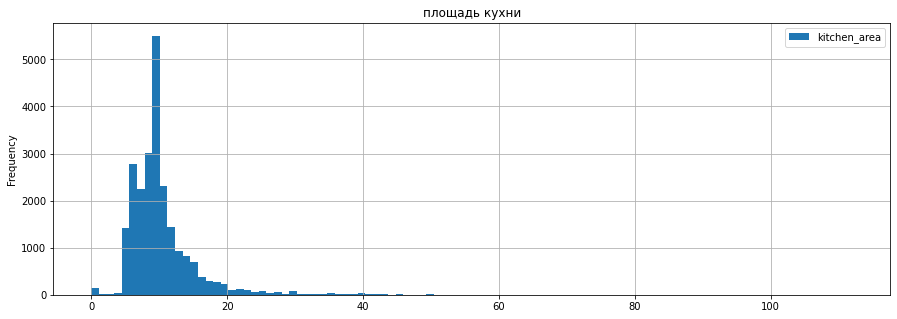

In [52]:
data
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, title='площадь кухни', grid=True, figsize = (15,5)) 
data['kitchen_area'].describe()        


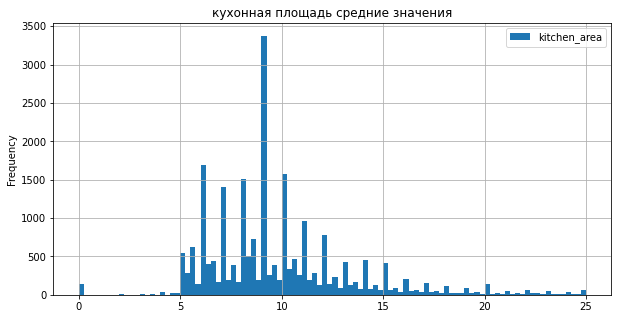

In [53]:
data.plot(y='kitchen_area', kind='hist', range=(0, 25), bins=100, 
          figsize=(10,5), grid=True, title='кухонная площадь средние значения') 
plt.show()

Данные выглядят вполне реалистично. Медианное значение в районе 9 кв.м, среднее 10,56. Есть выбросы (например, кухня 1,3 кв.м, или 112 кв.м, но они почти не влияют на данные. Высокий пик наблюдается в значении площади кухни 9 кв.м, есть значения от 6 до 15 кв.м. 
Есть пик со значением 0 кв.м, это могут быть квартиры-студии, значений выше 20 кв.м крайне мало и они выглядят выбросами.

#### Цена квартиры

Посмотрим на распределение цены квартиры

count     23538.000000
mean       6542.042055
std       10916.478249
min          12.190000
25%        3400.000000
50%        4648.500000
75%        6796.750000
max      763000.000000
Name: last_price, dtype: float64

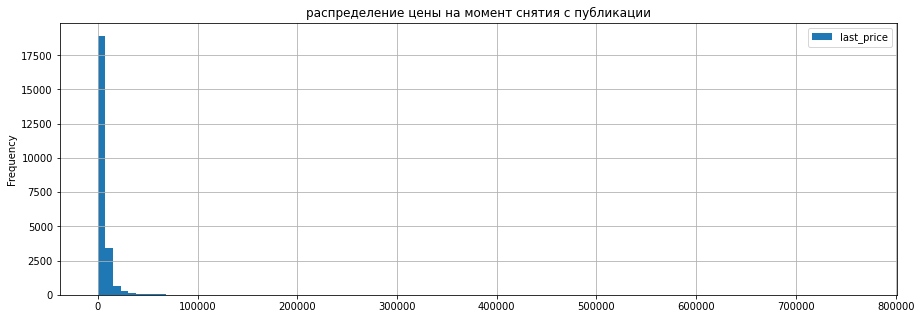

In [54]:
data.plot(y='last_price', kind='hist', bins=100, figsize=(15,5), 
          grid=True, title='распределение цены на момент снятия с публикации')

data['last_price'].describe() 


Зададим область для увеличения распределения по основным значениям

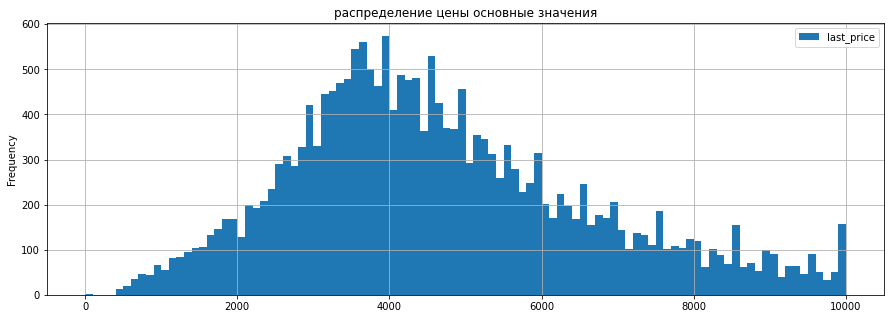

In [55]:
data.plot(y='last_price', kind='hist', range=(0, 10000), bins=100, 
          figsize=(15,5), grid=True, title='распределение цены основные значения') 
plt.show()

Посмотрим на распределение стоимости 1 кв.м квартиры

count    23538.000000
mean        99.403097
std         50.299219
min          0.111835
25%         76.584989
50%         95.000000
75%        114.229505
max       1907.500000
Name: square_meter_price, dtype: float64

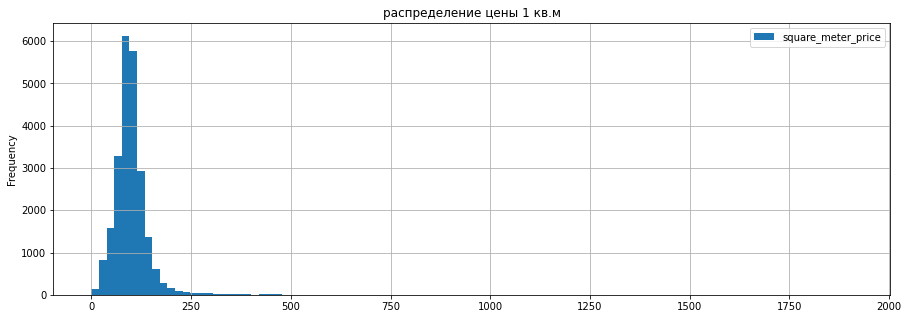

In [56]:
data.plot(y='square_meter_price', kind='hist', bins=100, figsize=(15,5), 
          grid=True, title='распределение цены 1 кв.м')

data['square_meter_price'].describe() 

Данные выглядят реалистичными. Так, как в выборке основное количество - одно-, двух- и трехкомнатные квартиры, при этом значительная часть кварти расположена не в городах, а в сельской местности, средняя стоимость 6,5 млн и медианная 4,65 млн. выглядят реальными. Наличие квартир стоимость в 10 и более млн. руб. также вполне вероятно. Распределение очень близко к нормальному, явных выбросов не наблюдается.

#### Количество комнат

Проверим распределение по количеству комнат

count    23538.000000
mean         2.070567
std          1.079532
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

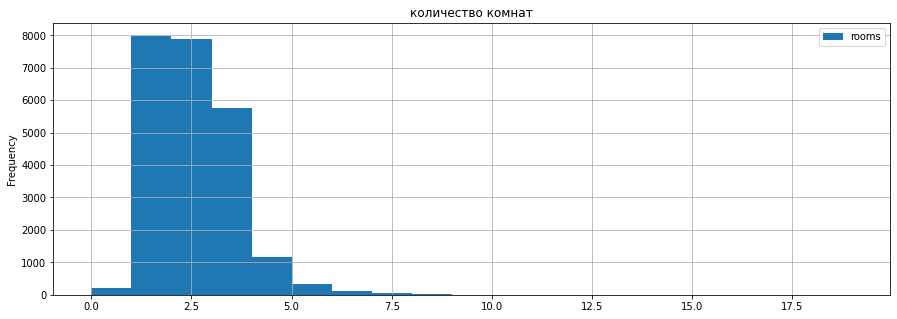

In [57]:
data.plot(y='rooms', kind='hist', bins=19, figsize=(15,5), grid=True, title='количество комнат')
data['rooms'].describe() 

Гипотеза, что большинство квартир относятся к типу одно- , двух- и трехкомнатных, подтвердилась. 
Нулевые значения, вероятно, квартиры-студии. Квартиры с количеством комнат более 6, редки, значения выше 7 можно считать единичными. Но вероятными. В данных могут быть квартиры индивидуальной планировки или бывшие коммунальные квартиры с большим количеством комнат

#### Высота потолков

Посмотрим на распределение высоты потолков

count    23538.000000
mean         2.697248
std          0.220979
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

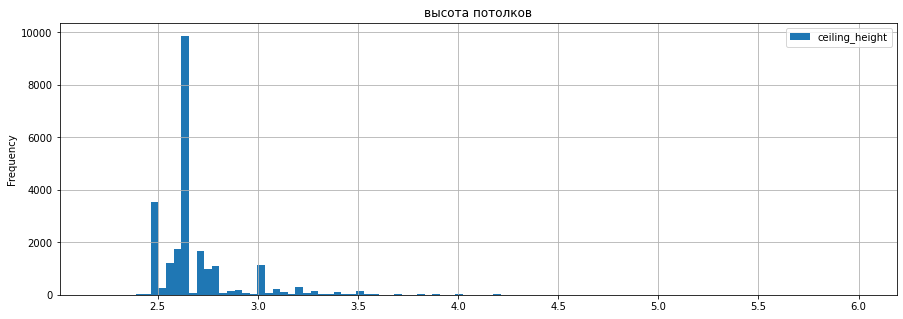

In [58]:
data.plot(y='ceiling_height', kind='hist', bins=100, figsize=(15,5), grid=True, title='высота потолков')
data['ceiling_height'].describe() 


Увеличим распределение основных значений

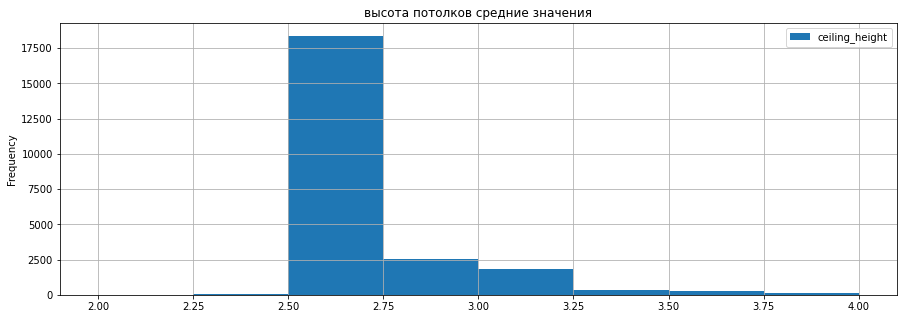

In [59]:
data.plot(y='ceiling_height', kind='hist', bins=8, range=(2,4), 
          figsize=(15,5), grid=True, title='высота потолков средние значения') 
plt.show()

Как и ожидалось, подавляющее большинство значений располагается от 2,5 до 2,75 м. Согласно СНиП 23-01 высота потолков жилых комнат и кухни должна быть не менее 2,5 м, допускается высота 2,1 м для коридоров и подсобных помещений при устройстве антресолей. Значения до 3,5 м теоретически возможны при индивидуальной застройке, например, в коттеджных поселках. Высоту полоков более 3,5 м логичнее считать выбросами.

#### Этаж

Посмотрим на распределение данных по этажам

count    23538.000000
mean         5.875308
std          4.867078
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

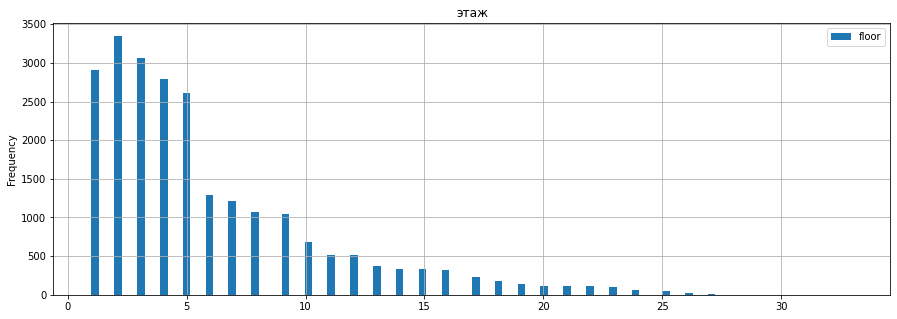

In [60]:
data.plot(y='floor', kind='hist', bins=100, figsize=(15,5), grid=True, title='этаж')
data['floor'].describe() 

Большинство квартир находится до 5-го этажа, из них выбивается 2-й этаж. Далее следует постепенное уменьшение квартир со знчениями более высокого этажа. Вероятно, что бОльшая часть квартир в выборке расположены в области.

#### Тип этажа

Для распределения данных по типам этажа квартиры используем круговую диаграмму

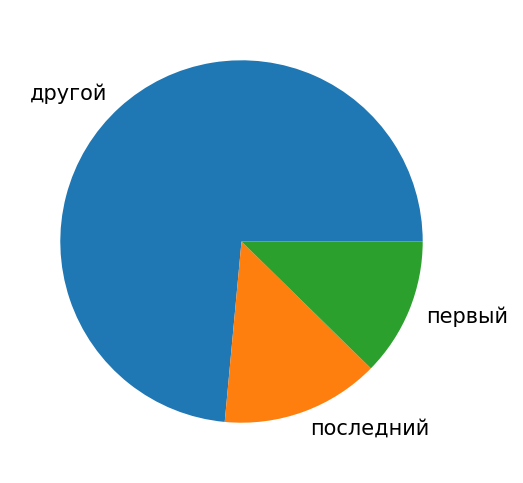

In [86]:
data['floor_category'].value_counts().to_frame().plot(kind='pie', y='floor_category', legend=False)
plt.ylabel('')
plt.gcf().set_dpi(150)

Примерно 75% этажей отнсятся к категории "другой", на долю первых и последних этажей приходится примерно 25% с распределением 13% последние этажи и 12% первые этажи

#### Общее число этажей

Посмотрим распределение данных об общем количестве этажей в доме

count    23538.000000
mean        10.668451
std          6.574668
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: floors_total, dtype: float64

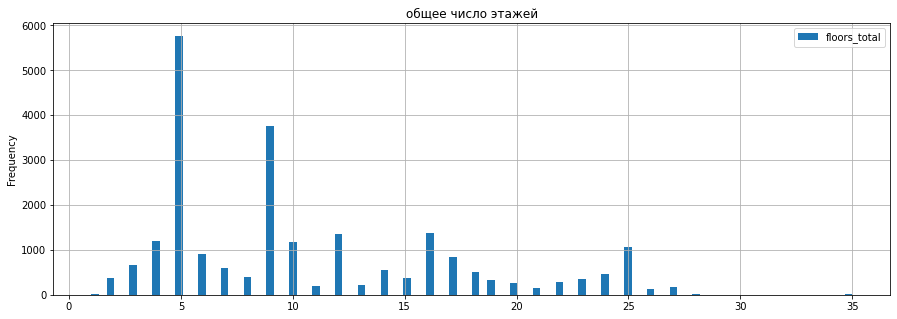

In [63]:
data.plot(y='floors_total', kind='hist', bins=100, figsize=(15,5), grid=True, title='общее число этажей') 
data['floors_total'].describe() 

Данные о количестве этажей вполне ожидаемы. Подавляющее большинство домов 5-ти этажные, 9-ти этажные. Из многоэтажных выделяются здания 10, 16, 25 этажей, вероятно, типовые застройки. Есть малоэтажные дома до 5 этажей, есть дома с нетиповым количеством этажей

#### Расстояние до центра города

count    18047.000000
mean     14189.200310
std       8611.386411
min        181.000000
25%       9238.000000
50%      13095.000000
75%      16282.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

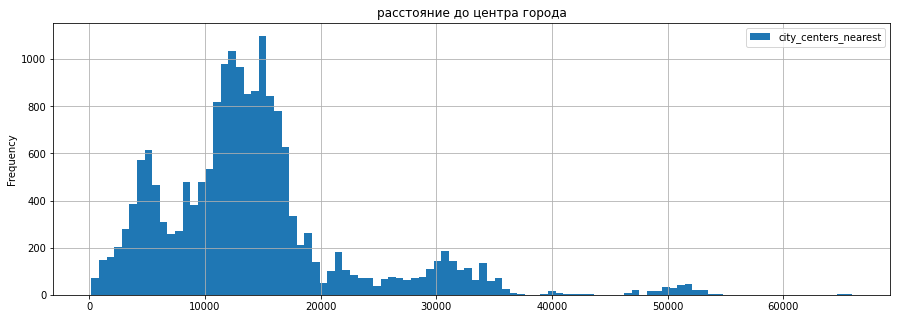

In [64]:
data.plot(y='city_centers_nearest', kind='hist', bins=100, figsize=(15,5), grid=True, title='расстояние до центра города')
data['city_centers_nearest'].describe()

В данных не уточняется, до центра какого именно города указано расстояние? Величины медианного и среднего значений 13 и 14 км. По графику видно, что подавляющее большинство расстояний до 20 км. Есть значения до 35 км. Расстояние в 66 км до центра города может относиться к объекту, расположенному глубоко в лесу, но вероятно, это все же ошибка данных. Протяженность Санкт-Петербурга с севера на юг 32 км, с северо-запада на юго-восток около 90 км (по данным Википедии). Для областных городов данные по расстоянию до центра города очевидно слишком большие. Можно предположить, что в часть данных содержит информацию не о расстоянии до центра локального города, а до центра Санкт-Петербурга. Информацию о данных нужно уточнять у тех, кто ее предоставил.

#### Расстояние до ближайшего аэропорта

Посмотрим на данные о расстоянии до ближайшего аэропорта

count    18024.000000
mean     28798.336607
std      12632.164896
min          0.000000
25%      18557.000000
50%      26757.000000
75%      37275.500000
max      84869.000000
Name: airports_nearest, dtype: float64

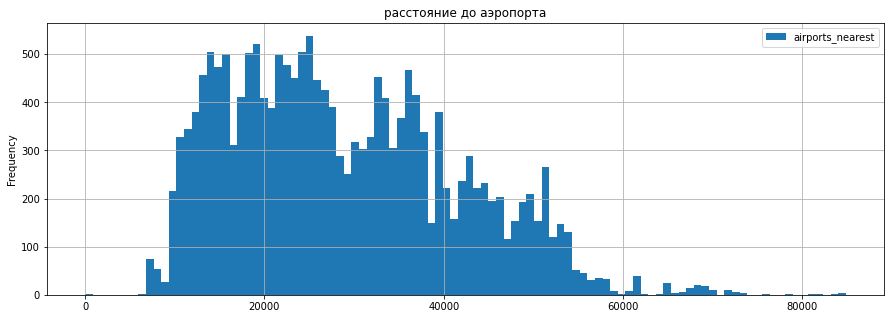

In [65]:
data.plot(y='airports_nearest', kind='hist', bins=100, figsize=(15,5), grid=True, title='расстояние до аэропорта')
data['airports_nearest'].describe() 

Справочное расстояние от центра Санкт-Петергурга до аэропорта Пулково составляет 21 км. Есть очень маленький процент выбросов в виде 0 км до аэропорта (если квартира не находится на территории аэропорта), среднее и медианное значения составляют 27 и 29 км, что вполне ожидаемо. Так, как квартиры расположены по всей ленобласти, максимальное значение 85 км также возможно. Данные реалистичны.

#### Расстояние до ближайшего парка

Посмотрим на данные о расстоянии до ближайшего парка

count    8021.000000
mean      490.523875
std       341.670671
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

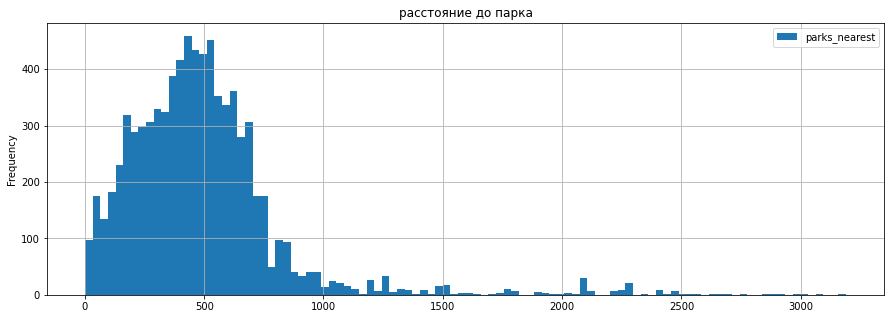

In [66]:
data.plot(y='parks_nearest', kind='hist', bins=100, figsize=(15,5), grid=True, title='расстояние до парка')
data['parks_nearest'].describe() 

В данных очевидно есть выбросы в виде растояния 1 м; медианное и среднее значения около 500 м вполне правдоподобны. Большинство значений до 750 м. Данные вполне реалистичны но не информативны. При необходимости более детального анализа нужно уточнять информацию. 

#### День недели публикации

Посмотрим на рапределение данных о публикации по дням недели

count    23538.000000
mean         2.567253
std          1.788304
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

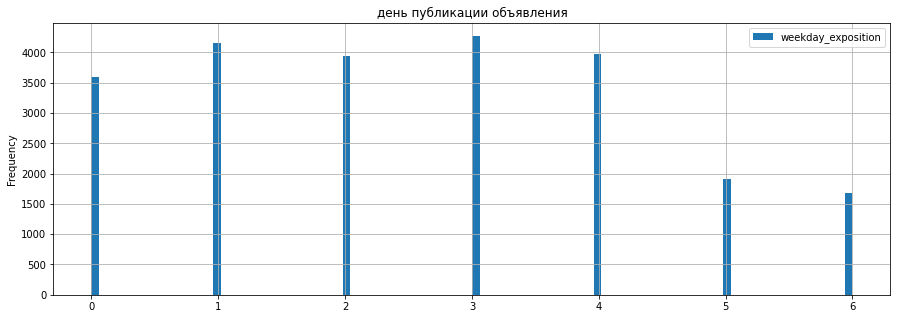

In [67]:
data.plot(y='weekday_exposition', kind='hist', bins=100, figsize=(15,5), grid=True, title='день публикации объявления')
data['weekday_exposition'].describe() 

По распределению видно, что в выходные публикуется примерно в половину меньше объявлений. В рабочие дни примерно одинаковое количество публикаций, незначительно больше во вторник и четверг.

#### Месяц публикации

Посмотрим на рапределение данных о публикации по месяцам

count    23538.000000
mean         6.401393
std          3.493168
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

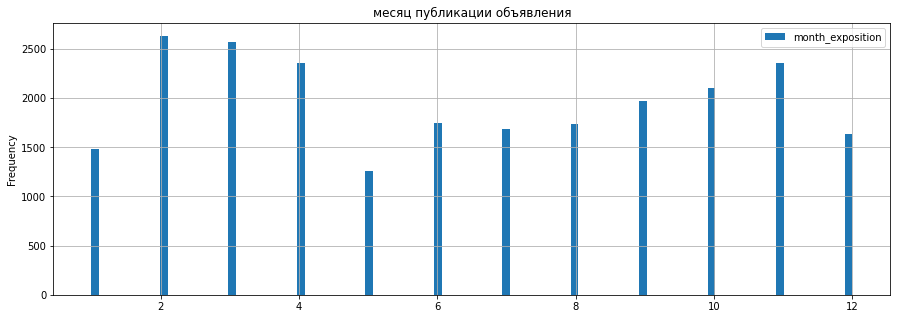

In [68]:
data.plot(y='month_exposition', kind='hist', bins=100, figsize=(15,5), grid=True, title='месяц публикации объявления')
data['month_exposition'].describe() 

По распределнию видно, что наименьшее количество публикаций приходится на январь и май, что вполне ожидаемо из-за длинных каникул. Пик активности приходится на февраль-апрель, что также вполне ожидаемо. В летние месяцы, период отпусков, активность снижается и постепенно увеличивается осенью. Осенний пик приходится на ноябрь. В декабре активность резко падает.

#### Срок продажи квартиры

Изучим данные о том, как быстро продавались квартиры на основании столбца days_exposition.

count    20372.000000
mean       180.789417
std        219.797379
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

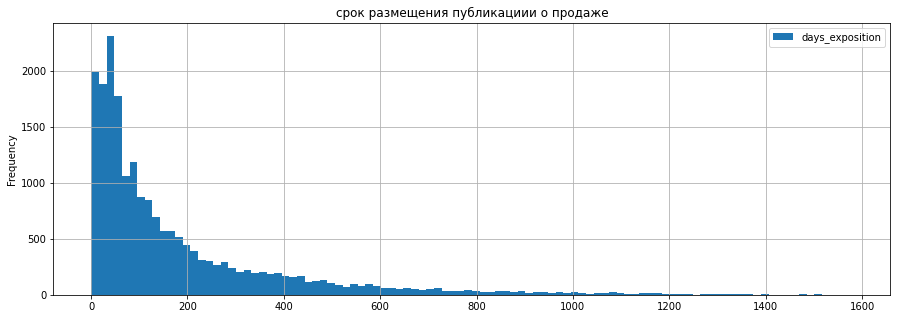

In [69]:
data.plot(y='days_exposition', kind='hist', bins=100, figsize=(15,5), grid=True,
          title='срок размещения публикациии о продаже')

data['days_exposition'].describe() 

Увеличим область распределения

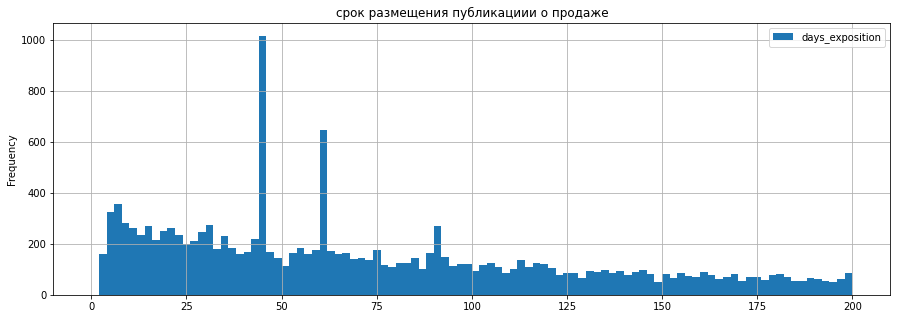

In [70]:
data.plot(y='days_exposition', kind='hist', bins=100, range=(0,200), figsize=(15,5), grid=True,
          title='срок размещения публикациии о продаже') 
plt.show()

Cгруппируем данные по длительности размещения объявления

In [71]:
data.groupby('days_exposition')['first_day_exposition'].count().sort_values(ascending=False).head(10) 

days_exposition
45.0    877
60.0    538
7.0     234
30.0    208
90.0    200
4.0     174
3.0     157
5.0     152
14.0    146
9.0     142
Name: first_day_exposition, dtype: int64

Среднее время продажи составляет 181 день, медианное 95 дней. Разница очевидно вызвана экстремальными значениями свыше 650 дней и  меньше 9 дней. При этом у 13% объявлений не указан срок продажи. Мы не знаем причин снятия объявления с публикации. Внезапные пики возникают на 45, 60 и 90 днях. Это слишком ровные промежутки времени - полтора, два и три месяца, может быть это связано с условиями размещения объявлений. Данные нуждаются в уточнениях у тех, кто их предоставил.  

Для уточнения, какие продажи можно считать сверхбыстыми, а какие - необычно долгими, воспользуемся методом boxplot() 

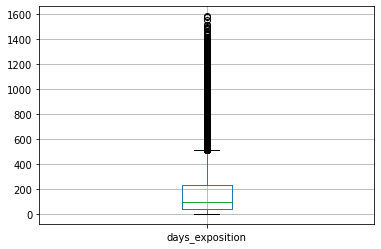

In [72]:
data.boxplot(column = 'days_exposition')
plt.show() 

Сравнивая гистограммы, диаграмму размаха и результат группировки по длительности размещения объявления, мы можем считать продажи до 9 дней сверхбыстрыми, а продажи дольше 500 дней - необычно долгими.

In [73]:
data['days_exposition'].quantile([0.05, 0.95])

0.05      9.0
0.95    648.0
Name: days_exposition, dtype: float64

### Влияние разных факторов на полную стоимость объекта 

Рассмотрим, какие факторы больше всего влияют на общую (полную) стоимость объекта.

#### Коэффициенты корреляции

Рассчитаем коэффициенты корреляции для интересующих нас параметров

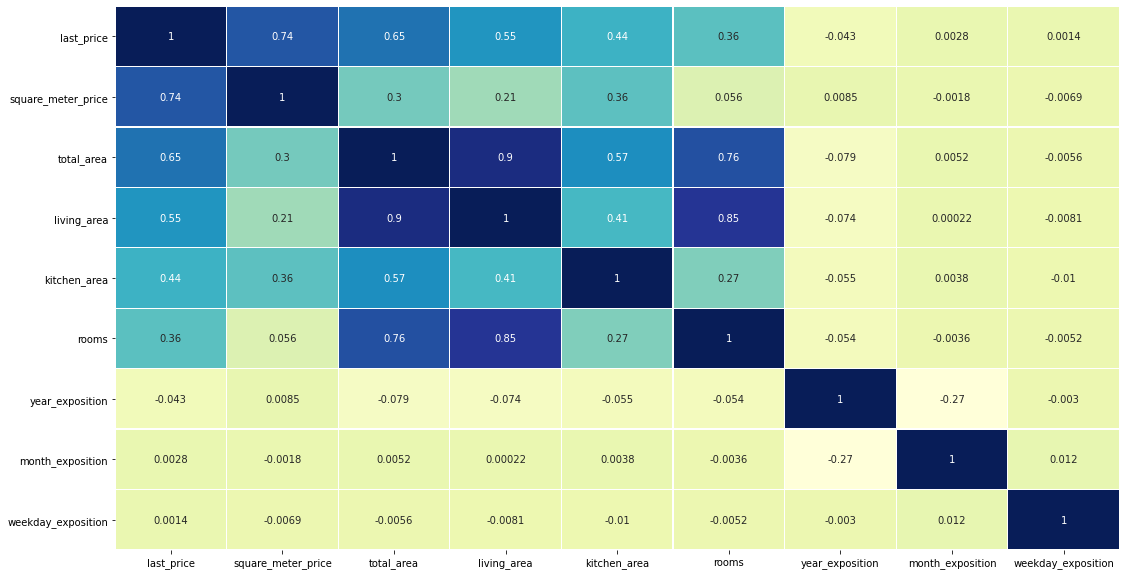

In [74]:
plt.figure(figsize=(18, 10)) 
sns.heatmap(data[['last_price', 'square_meter_price', 'total_area', 'living_area', 'kitchen_area', 'rooms',
                  'year_exposition', 'month_exposition', 'weekday_exposition']].corr(),
            annot=True, cmap='YlGnBu', cbar=False, robust=True, linewidths=.2) 
plt.show() 

Средняя корреляция между общей стоимостью и общей площадью квартиры (коэффициент коореляции 0,65), жилой площадью (коэффициент корреляции 0,55). Слабая корреляция между стоимостью квартиры и площадью кухни (0,44), еще слабее - между стоимостью и количеством комнат (0,36). Корреляция между стоимостью квартиры и датой размещения (год, месяц, день) стремится к нулю.
Не будем забывать, что коэффициент корреляции показывает только линейную зависимость. Бывает, что коэффициент нулевой не потому, что связи между значениями нет, а из-за того, что у неё более сложный, не линейный характер. 
Данные о влиянии типа этажа (первый, последний, другой) рассмотрим отдельно.

#### Зависимость стоимости от даты размещения

Зависимость цены от даты размещения объявления (дня недели)

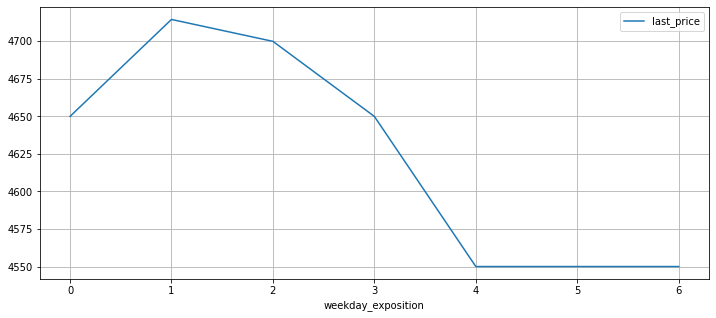

In [75]:
day_price = (
    data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median').
    plot(grid=True, figsize=(12, 5))
)   

Зависимость цены от даты размещения объявления (месяца)


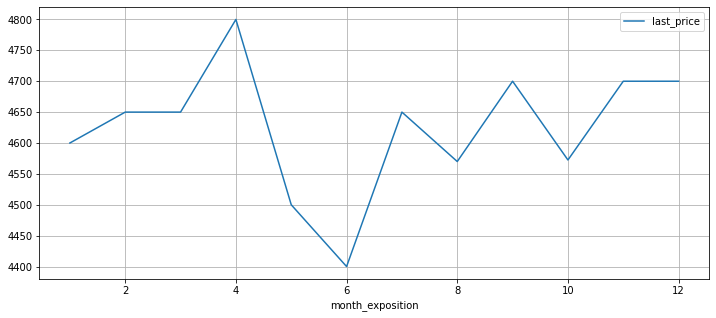

In [76]:
month_price = (
    data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').
    plot(grid=True, figsize=(12, 5))
)   

Зависимость цены от даты размещения объявления (года)

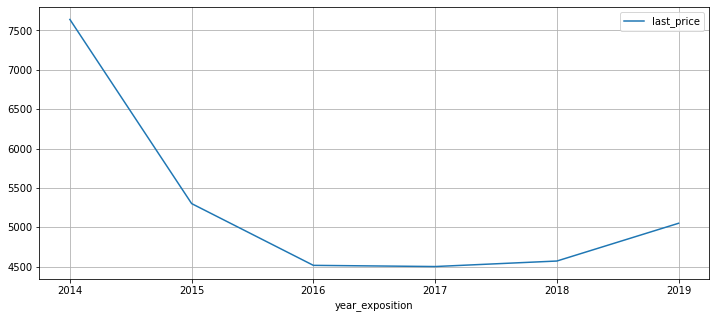

In [77]:
year_price = (
    data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').
    plot(grid=True, figsize=(12, 5))
)   

Как и предполагалось, зависимость стоимости от даты публикации не линейная. Видно, что стоимость квартир снижается с 2014 по 2016 г., цены достигают минимума, после 2017 г. начинается плавный подъем, что вероятнее всего вызвано экономическими причинами. Разброс по дням недели повторяет динамику активности людей - увеличение с понедельника ко вторнику, постепенное понижение к выходным и минималне значения в пятницу и выходные. Распределение по месяцам показывает самую высокую стоимость в апреле и сентябре, самую низкую в июне. Возможно, это также влияние сезонности и периода отпусков.

#### Зависимость стоимости квартиры от типа этажа - первый, последний, другой

Построим сводную таблицу зависимости цены от типа этажа и количества комнат и выведем результат 

In [78]:
price_floor_category = data.pivot_table(index='floor_category', values='last_price', columns='rooms')  
display (price_floor_category) 

rooms,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,19
floor_category,,,,,,,,,,,,,,,,,
другой,3391.201429,3980.554528,6002.428340,8669.757560,14250.357251,22952.479566,29138.184406,38929.189189,53940.000000,23375.00,15500.0,33000.0,NaN,26829.5,65000.0,NaN,32250.0
первый,2557.555556,3223.803071,4176.311394,5863.889243,8037.541843,12076.274435,16369.577778,29316.815200,25063.333333,68984.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
последний,3336.200000,3385.279862,4990.746331,7743.177071,14312.369381,34522.604030,44525.500000,85280.588235,64450.000000,20875.00,31500.0,17500.0,420000.0,NaN,NaN,28500.0,NaN


По полученной таблице построим графики зависимости

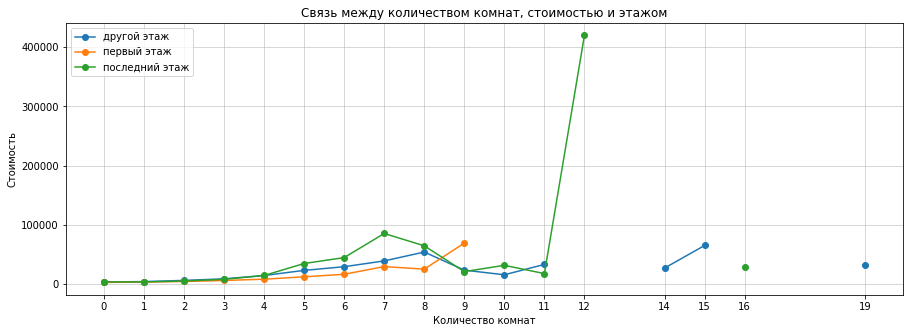

In [79]:
fig, ax = plt.subplots(figsize=(15, 5))

for i in price_floor_category.index:
    ax.plot(price_floor_category.columns, price_floor_category.loc[i], marker ='o', label=f'{i} этаж')
plt.xticks(price_floor_category.columns)
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')
plt.grid(linestyle='-', linewidth=0.5)
plt.legend(loc='upper left')
plt.title('Связь между количеством комнат, стоимостью и этажом')
plt.show() 

Стоимость квартир очень медленно увеличивается до 3-го этажа, далее постепенно растет. Видно более динамичное повышение цены квартир на первом этаже с увеличением числа комнат больше 6. Вероятно, такие квартиры можно использовать как объекты нежилого фонда (под офисы или мини-отели). Квартиры на последнем этаже имеют похожую динамику роста до 7 комнат, квартиры на других этажах - до 8 комнат. На графике видны отдельные точки с увеличением комнат больше 11 - это либо аномальные, редие объекты, либо выбросы. Линейной зависимости между типом этажа и стоимостью квартиры не наблюдается.

#### Определение населённых пунктов с самой высокой и низкой стоимостью квадратного метра

Определим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
Для этого рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [80]:
# выведем 10 локаций с ценами по наибольшему числу объявлений
local = data.pivot_table(index = 'locality_name', values = 'square_meter_price', aggfunc=['count', 'mean'])
local.columns = ['count', 'mean']
local = local.sort_values('count', ascending = False)
display(local.head(10)) 

# самая высокая стоимость
print("самая дорогая стоимость квадратного метра", '\n', local[local['mean']==local['mean'].max()])
print()

# самая низкая стоимость
print("самая дешевая стоимость квадратного метра", '\n', local[local['mean']==local['mean'].min()]) 

,count,mean
locality_name,,
Санкт-Петербург,15637,114.845504
поселок Мурино,552,85.629569
поселок Шушары,439,78.551345
Всеволожск,397,68.719320
Пушкин,369,103.125819
Колпино,338,75.424579
поселок Парголово,327,90.175913
Гатчина,307,68.746147
деревня Кудрово,299,92.473548


самая дорогая стоимость квадратного метра 
                count        mean
locality_name                   
Зеленогорск       24  115.122799

самая дешевая стоимость квадратного метра 
                     count       mean
locality_name                       
деревня Старополье      3  11.206221


Как и ожидалось, Санкт-Петербург лидирует по числу объявлений. А вот самая большая стоимость оказалась не в Санкт-Петербурге, а Зеленогорске. В десятку локаций с самым большим числом объявлений этот населенный пункт не вошел, можем предположить, что это коотеджный поселок малой застройки с элитным жильем. Самая низкая цена оказалась в деревне, что вполне ожидаемо.

#### Вычисление средней цены каждого километра Санкт-Петербурга

Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра. 
Для этого выведем все строки из датафрейма с локацией СПб и составим сводную таблицу зависимости цены от расстояния до центра.

In [81]:
display(data.loc[data['locality_name'] == 'Санкт-Петербург'].
        pivot_table(index='city_center_distance', values='last_price', aggfunc='mean').
        head(15)) 

,last_price
city_center_distance,
0.0,31449.115852
1.0,21206.720828
2.0,17788.319613
3.0,11137.394687
4.0,13304.279529
5.0,14455.995621
6.0,15338.418387
7.0,14775.152586
8.0,9936.608378


Распределение вполне ожидаемое. С увеливением растояния от центра города стоимость уменьшается. Для наглядности постоим график зависимости цены от удаленности от центра.

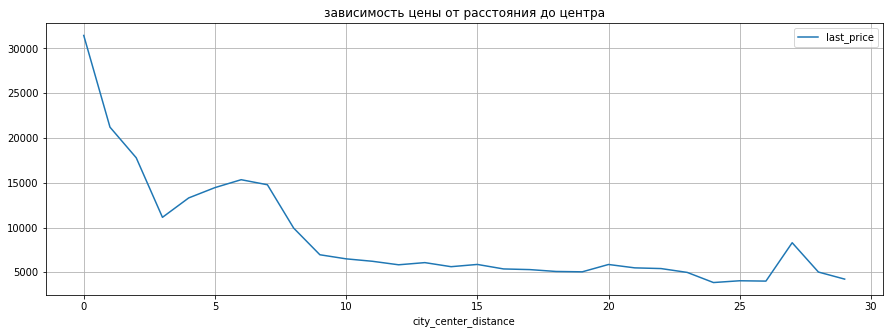

In [82]:
(data.loc[data['locality_name'] == 'Санкт-Петербург'].
        pivot_table(index='city_center_distance', values='last_price', aggfunc='mean').
    plot(style='-', figsize=(15, 5), title='зависимость цены от расстояния до центра', grid=True)
)
plt.show()

По графику видно, что завсисимость имеет не линейный характер. В целом с увеличением расстояния цена снижается, но есть пики. Это может быть вызвано принадлежностью к определенному району, индивидуальными особенностями жилья, выбросами в данных. Но очевидно, что удаленность от центра - не единственный параметр, влияющий на стоимость.

### Общий вывод

Нами проведена предобработка и изучение данных сервиса Яндекс Недвижимость — архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах с целью найти интересные особенности и зависимости, которые существуют на рынке недвижимости.  В предоставленной базе содержится два типа данных: добавленные пользователем и картографические. Перввое знакомство с данными выявило первые проблемы и неудобства. Вероятно, часть некорректных и пропущенных значений является ошибками ввода, часть - следствием невозможности обработать неполный адрес объекта.  
В процессе предобработки были устранены пропуски, исправлены некорректные значения и типы данных, где это было обосновано, руководствуясь принципом, что заполнение должно обоснованно повышать качество данных. В некоторых ситуациях сложно принять решение о целесообразности заполнения пропусков и только эксперименты и сравнение результатов помогают принять правильное решение.  
Оптимизированы названия населенных пунктов. Посчитаны и добавлены в таблицу цена квадратного метра жилья, расшифрована дата публикации (добавлены столбцы с информацией о дне недели, месяце и годе размещения объявлений), добавилены категории по этажам квартир.  
Проведен исследовательский анализ данных, рассмотрены параметры объектов: общая и жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления. Изучена скорость продажи квартир. Изучена зависимость общей стоимости квартир от следующих факторов: общей и жилой площади, площади кухни, количества комнат, этажа, на котором расположена квартира, даты размещения.  
Для визуализации распределения величин и взаимосвязи параметров были составлены графики и гистограммы, выведены коэффициенты корреляции.

Из полученного датасета можно сделать вывод, что самая дорогая стоимость квадратного метра не в Санкт-Петербурге, как ожидалось, а в Зеленогорске. Самая дешевая цена за кв.м оказалась в деревне деревня Старополье. По количеству объявлений вполне ожидаемо лидирует Санкт-Петербург. В центре Петербурга квартиры дороже, чем на окраине или в городах-спутниках. Самое большое количество предложений о продаже однокомнатных кварти и студий, двух- и трехкомнатных квартир. На стоимость влияет сезонная активность, летом и в новогодное каникулы цены несколько снижаются, весной и осенью - растут. Пик роста приходится на апрель.  
Существует однозначная зависимость между мостью квартиры и ее общей площадью, чуть меньше - между стоимостью и жилой площадью, площадью кухни, количеством комнат. Стоимость квартиры зависит и от других факторов, она сильно зависит от населенного пункта, в больших населенных пунктах она так же будет зависеть от расстояния до центра. Не всегда эта завсисимость имеет линейный характер.  
За рассматриваемый период 2014-2019 гг. стоимость квартир снижалась с 2014 по 2016 г., в 2017 г. начался плавный подъем.  
Для более точной оценки рыночной стоимости рекомендую поработать над более качественным сбором информации - снизить количество возможных пропусков и некорректных значений не простым вводом данных, а выбором между возможными значениями, например, ограничить высоту потолков диапазоном от 2-х до 6 метров, выбирать этажность здания из предложенного перечня и т.д. Также следует учитывать такие факторы, как район города и расстояние до станции метро (для Санкт-Петербурга), год постройки здания, наличие лифта, состояние квартиры и здания (косметический и капитальный ремонт), проведен ли газ, наличие горячего водоснабжения, канализации, центрального отопления (для области).  
Стоимость квартиры при этом зависит от совокупности всех факторов не линейно - квартиры в старинных домах в центре Санкт-Петербурга ценятся за расположение, историческую и культурную ценность, даже при необходимости огромных вложений в ремонт, а однокомнатные квартиры в пригородах - за ликвидность и возможность сдачи в аренду без дополнительных затрат.